<a href="https://colab.research.google.com/github/manishrathod2003/Machine-Learning/blob/main/Day4_28feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**

Uni-Variate and Bi-Variate Analysis

https://mlu-explain.github.io/   
https://datatab.net/

Types of Machine Learning:
1. Supervised Learning
2. Unsupervised Learning
3. Reinforcement Learning

Variables:
- Categorial
- Confounding
- Control
- Dependent
- Independent

**Supervised ML:**  
Target(Dependent) ---> Categorical ---> Classification  
Target(Dependent) ---> Continuous  ---> Regression

Estimation - Point & Interval

Regression : Temp next hr?
1. Regression Analysis
 - Linear Regression
 - Logistic Regression

Classification : next hr - hot/cold
1. Tree Analysis
 - Random Forest
 - XGBoost
 - Decision Trees
 - Support Vector Machine
 - Naive Bayes

**Linear Regression**: Assumes that there is linear relation between x and y.  
                  
       y = βᵢ + βⱼ x

y = dependent(target)  
x = independent

Types of Linear Regression(LR):
- Simple/Single LR  : single dependent & independent variable
- Multiple LR       : multiple independent variables

Evaluation of Regression:
- Error(Residuals) --> MSE(Mean Squared Error), RMSE(Rooted MSE), MAE(Mean Absolute Error)
- Accuracy(calculated by variances) --> R^2(R-Squared) - Overfitted, Adjusted R^2 - Underfitted

Error = (Unexplained Variance)/(Total Variance)

R^2 = 1 - (Explained Variance)/(Total Variance)

R^2 doesn't affect by no. of features \^

# Linear Regression Demo

Problem Statement: Given the dataset of Marketing Expendicture, we have to predict the sales

In [65]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [66]:
df = pd.read_csv('/content/Advertising.csv')

#Primary EDA on Data
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [67]:
#Check for Null Values
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
radio,0
newspaper,0
sales,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [107]:
#Removing Unwanted Features
#df.drop(['Unnamed: 0'], inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


- Simple LR

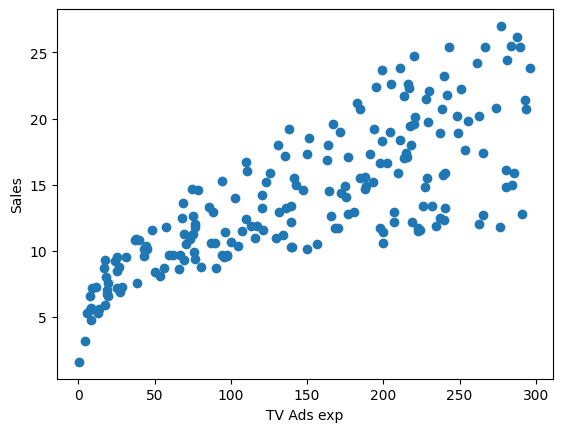

In [76]:
plt.scatter(df['TV'], df['sales'])
plt.xlabel('TV Ads exp')
plt.ylabel('Sales')
plt.show()

In [77]:
#Separating Independent and Dependent Variables
x = df['TV'].values.reshape(-1,1)       #Independent Variable
y = df['sales'].values.reshape(-1,1)    #Dependent Variable

In [78]:
print(x)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [79]:
#Building LR Model
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [80]:
#Make Predicting
y_pred=model.predict(x)
print(y_pred)

[[17.97077451]
 [ 9.14797405]
 [ 7.85022376]
 [14.23439457]
 [15.62721814]
 [ 7.44616232]
 [ 9.76595037]
 [12.74649773]
 [ 7.44140866]
 [16.53041431]
 [10.17476548]
 [17.23871025]
 [ 8.16396559]
 [11.66741599]
 [16.73482186]
 [16.32125309]
 [10.25557777]
 [20.40940417]
 [10.32212907]
 [14.03474068]
 [17.41459582]
 [18.31779199]
 [ 7.6600772 ]
 [17.88520856]
 [ 9.99412625]
 [19.52997632]
 [13.82557947]
 [18.44614092]
 [18.85970969]
 [10.38868036]
 [20.95607553]
 [12.39948025]
 [11.653155  ]
 [19.65832525]
 [11.58185004]
 [20.85149492]
 [19.72012288]
 [10.58358059]
 [ 9.08142275]
 [17.87094757]
 [16.65876324]
 [15.44657891]
 [20.98935118]
 [16.86792445]
 [ 8.22576322]
 [15.35625929]
 [11.2966302 ]
 [18.43663359]
 [17.83291826]
 [10.21279479]
 [16.53041431]
 [11.80527225]
 [17.31952254]
 [15.71278409]
 [19.52046899]
 [16.48763133]
 [ 7.37961102]
 [13.50708398]
 [17.05331735]
 [17.04856369]
 [ 9.57580381]
 [19.45391769]
 [18.4081116 ]
 [11.91460652]
 [13.26464711]
 [10.31262174]
 [ 8.52999

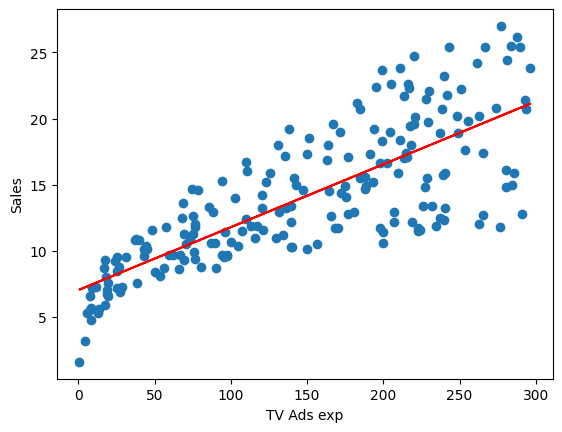

In [81]:
#Showing Bestfit line of regression
plt.scatter(df['TV'],df['sales'])
plt.plot(df['TV'],y_pred,color='red')
plt.xlabel('TV Ads exp')
plt.ylabel('Sales')
plt.show()

In [82]:
#coeficients
print(model.coef_)  #b1 Slope
print(model.intercept_) #b0 intercept

[[0.04753664]]
[7.03259355]


In [83]:
#y=7.032+0.0475*TV

In [84]:
#Model Evaluation
print("MSE:",metrics.mean_squared_error(y,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y,y_pred)))
print("R2:",metrics.r2_score(y,y_pred))

MSE: 10.512652915656757
RMSE: 3.2423221486546887
R2: 0.611875050850071


In [85]:
#Predictions on User inputs
Tv_exp=int(input("Enter TV expenditure: "))
print("Estimated Sales(thousands):",model.predict([[Tv_exp]]))

Enter TV expenditure: 1000
Estimated Sales(thousands): [[54.56923398]]


**Multiple Linear Regression**

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [98]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [99]:
x=df.drop(columns=['sales']).values
y=df['sales'].values.reshape(-1,1)

In [100]:
print(x)
print(y)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [101]:
model.fit(x,y)

LinearRegression()

In [102]:
y_pred=model.predict(x)
print(y_pred)

[[20.52397441]
 [12.33785482]
 [12.30767078]
 [17.59782951]
 [13.18867186]
 [12.47834763]
 [11.72975995]
 [12.12295317]
 [ 3.72734086]
 [12.55084872]
 [ 7.0322992 ]
 [17.28512918]
 [10.57712073]
 [ 8.82630048]
 [18.43436638]
 [20.81929952]
 [12.82365674]
 [23.22495716]
 [ 9.95168206]
 [14.16607293]
 [18.10076728]
 [14.7405382 ]
 [ 6.4891503 ]
 [16.5459329 ]
 [ 8.14651887]
 [15.6100386 ]
 [14.98951429]
 [17.05167344]
 [19.41053803]
 [ 9.14402389]
 [21.6339338 ]
 [11.3460929 ]
 [ 7.63888314]
 [18.86426829]
 [ 7.57483051]
 [17.00682618]
 [23.40590052]
 [15.62347779]
 [ 9.90868103]
 [20.44761039]
 [16.37766467]
 [17.2959832 ]
 [21.59580326]
 [13.96385684]
 [ 8.88787996]
 [15.16152314]
 [ 8.87338673]
 [21.7226299 ]
 [16.26362018]
 [ 8.1681656 ]
 [12.63121132]
 [ 9.33981296]
 [20.66297563]
 [19.94469957]
 [20.37443008]
 [21.2926106 ]
 [ 8.52771254]
 [12.77458802]
 [21.89805198]
 [18.13348698]
 [ 5.74215558]
 [22.89067208]
 [16.78426073]
 [13.21069202]
 [16.97773556]
 [ 7.84904532]
 [ 9.01603

In [103]:
#Model Evaluation
print("MSE:",metrics.mean_squared_error(y,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y,y_pred)))
print("R2:",metrics.r2_score(y,y_pred))

MSE: 2.784126314510936
RMSE: 1.6685701407225697
R2: 0.8972106381789522


In [104]:
print(model.coef_)  #b1,b2,b3
print(model.intercept_)  #b0

[[ 0.04576465  0.18853002 -0.00103749]]
[2.93888937]


In [105]:
#y=2.93+0.045*TV+0.188*radio+(-0.001)*newspaper

In [106]:
#Predictions on User inputs
Tv_exp=int(input("Enter TV expenditure: "))
radio_exp=int(input("Enter radio add expenditure: "))
news_exp=int(input("Enter News paper expenditure: "))
print("Estimated Sales(thousands):",model.predict([[Tv_exp,radio_exp,news_exp]]))

Enter TV expenditure: 1000
Enter radio add expenditure: 350
Enter News paper expenditure: 450
Estimated Sales(thousands): [[114.22216888]]
